<a href="https://colab.research.google.com/github/nihar-max/ted_talk_views_prediction/blob/master/TEDX_Talk_Views_Prediction_Part_2_Feature_Engineering_%26_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import  seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Using Pandas library to load dataset
df = pd.read_csv('/content/drive/MyDrive/TED_Talk_views_prediction/df.csv',
                  engine="python",
                  error_bad_lines=False,
                  encoding='utf-8')

<ipython-input-3-7e75291a1cd5>:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('/content/drive/MyDrive/TED_Talk_views_prediction/df.csv',


In [ ]:
df.drop(['count','Unnamed: 0'], axis=1, inplace=True)

In [ ]:
df.head(1)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,comments_NAN,all_speakers_NAN,occupations_NAN,about_speakers_NAN,comments_end_distribution,all_speakers_most_frequent_category,occupations_frequent_category,about_speakers_most_frequent_category,event_counts,Description_count
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,...,0,0,0,0,272.0,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,42,39


# 1.0 Feature Engineering

#### 1.1 Create No of Speakers feature

In [ ]:
import ast
# This code will handle NaN values as well.
def safe_literal_eval(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return x  # Return original value if conversion fails

# Apply the function to the column
df['all_speakers'] = df['all_speakers'].apply(safe_literal_eval)

In [ ]:
def count_speakers(dd):
  if isinstance(dd,dict):
    return len(dd)
  else:
    return 0

In [ ]:
df['no_of_speakers'] = df['all_speakers'].apply(count_speakers)

In [ ]:
df['no_of_speakers'].value_counts()

1    3887
2      97
3      13
0       4
4       3
5       1
Name: no_of_speakers, dtype: int64

**Observation**: So this new feature consist of counts of all those speakers who are present in partical TED Talk event so we have to check wheather multiple speakers in TED Talk does impact the viewership or not.

#### 1.2 Create topics_count feature which will create a count of each topic covered in particular TED Talk.

In [ ]:
type(df.topics[0])

str

In [ ]:
import ast
# This code will handle NaN values as well.
def safe_literal_eval(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return x  # Return original value if conversion fails

# Apply the function to the column
df['topics'] = df['topics'].apply(safe_literal_eval)

In [ ]:
type(df.topics[0])

list

In [ ]:
def count_topics(dd):
  if isinstance(dd,list):
    return len(dd)
  else:
    return 0

In [ ]:
df['count_topics'] = df['topics'].apply(count_topics)

In [ ]:
df['count_topics'].value_counts().head(5)

5    573
7    503
6    482
8    418
4    383
Name: count_topics, dtype: int64

**Observation:** So the reason of creating this feature is to understand the if viwers like to watch the TED Talk which covers the max topics in single video or not.

In [ ]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript', 'published_year',
       'published_month', 'published_day', 'comments_mean', 'comments_NAN',
       'all_speakers_NAN', 'occupations_NAN', 'about_speakers_NAN',
       'comments_end_distribution', 'all_speakers_most_frequent_category',
       'occupations_frequent_category',
       'about_speakers_most_frequent_category', 'event_counts',
       'Description_count', 'no_of_speakers', 'count_topics'],
      dtype='object')

#### 1.3 Convert Duration in Sec to Min feature

In [ ]:
df['duration_in_min'] = df['duration']
min = []
for i in  df['duration']:
  if i>0:
    min.append(i//60)
  else:
    pass

df['duration_in_min'] = min

In [ ]:
df['duration_in_min'].head()

0    16
1    19
2    21
3    18
4    19
Name: duration_in_min, dtype: int64

<h4>1.4 Native_lang (check its feasibility) </h4>

In [ ]:
df['native_lang'].value_counts()

en       3957
es         27
fr          9
ja          3
hi          2
de          1
pt          1
ko          1
zh-cn       1
ar          1
pt-br       1
it          1
Name: native_lang, dtype: int64

<h4>1.5 Number_of_available_lang</h4>

In [ ]:
import ast
# This code will handle NaN values as well.
def safe_literal_eval(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return x  # Return original value if conversion fails

# Apply the function to the column
df['available_lang'] = df['available_lang'].apply(safe_literal_eval)

In [ ]:
type(df['available_lang'][0])

list

In [ ]:
def count_available_lang(dd):
  if isinstance(dd,list):
    return len(dd)
  else:
    return 0

In [ ]:
df['count_available_lang'] = df['available_lang'].apply(count_available_lang)

<h4> 1.6 Age (current_year - release_year)</h4>

In [ ]:
type(df['published_year'][0])

numpy.int64

In [ ]:
df['Age_of_Video']= 2023 - df['published_year']

In [ ]:
df['Age_of_Video'].sample(5)

704     13
3808     3
1819     9
3621     4
441     14
Name: Age_of_Video, dtype: int64

In [ ]:
df['related_talks'][0]

'{243: \'New thinking on the climate crisis\', 547: \'The business logic of sustainability\', 2093: \'The state of the climate — and what we might do about it\', 54715: \'How we can turn the tide on climate\', 29968: \'The most important thing you can do to fight climate change: talk about it\', 2339: "Climate change is happening. Here\'s how we adapt"}'

<h3>1.7.1 Use One hot encoding for Release_day & Release Month</h3>

In [ ]:
#release_day_one_hot_encoder = pd.get_dummies(df,df['published_day'],drop_first=True)

df = pd.get_dummies(df, columns=['published_day'], drop_first=True)

In [ ]:
df = pd.get_dummies(df, columns=['published_month'], drop_first=True)

In [ ]:
df.head(1)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,published_month_3,published_month_4,published_month_5,published_month_6,published_month_7,published_month_8,published_month_9,published_month_10,published_month_11,published_month_12
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,...,0,0,0,1,0,0,0,0,0,0


### 1.7.2 Use one hot encoding for Native Lang feature

In [ ]:
df = pd.get_dummies(df, columns=['native_lang'], drop_first=True)

### 1.7.3 Related Talks convert to related_talks_avg_views




In [ ]:
type(df['related_talks'][0])

str

In [ ]:
import ast
# This code will handle NaN values as well.
def safe_literal_eval(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError):
        return x  # Return original value if conversion fails

# Apply the function to the column
df['related_talks'] = df['related_talks'].apply(safe_literal_eval)

In [ ]:
df['related_talks_avg_views'] = 0

In [ ]:
for index, row in df.iterrows():
    related_ids=list(row['related_talks'].keys())
    views = 0
    count = 0
    for i in range(len(df)):
      if df.loc[i,'talk_id'] in related_ids:
        views = views + df.loc[i,'views']
    df.loc[index,'related_talks_avg_views']=views//6

In [ ]:
df['related_talks_avg_views'][0]

1659584

### 1.7.4 Speaker_1_avg_views

In [ ]:
d = df.groupby('speaker_1').agg(Speaker1_avg_views=('views', np.mean)).reset_index()

In [ ]:
# pd.concat([df, d], axis=1, join='inner')


df = pd.merge(df, d, how="outer", on=["speaker_1", "speaker_1"])

In [ ]:
df.head(2)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,native_lang_fr,native_lang_hi,native_lang_it,native_lang_ja,native_lang_ko,native_lang_pt,native_lang_pt-br,native_lang_zh-cn,related_talks_avg_views,Speaker1_avg_views
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,...,0,0,0,0,0,0,0,0,1659584,2190599.25
1,243,New thinking on the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,2187523,2008-03-03,2008-04-08,TED2008,...,0,0,0,0,0,0,0,0,1389374,2190599.25


### 1.7.4 Event avg_views

In [ ]:
d = df.groupby('event').agg(Event_avg_views=('views', np.mean)).reset_index()

d

,event,Event_avg_views
0,Arbejdsglaede Live,1.098265e+06
1,Business Innovation Factory,4.324465e+05
2,Chautauqua Institution,3.402567e+05
3,Countdown,1.493370e+06
4,Currently,1.960247e+06
...,...,...
454,Taste3 2008,1.242964e+06
455,The TED Interview,6.598470e+05
456,The Way We Work,9.671994e+05
457,Torchbearers,1.615020e+04


In [ ]:
df = pd.merge(df, d, how="outer", on=["event", "event"])

In [ ]:
df.sample(2)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,...,native_lang_hi,native_lang_it,native_lang_ja,native_lang_ko,native_lang_pt,native_lang_pt-br,native_lang_zh-cn,related_talks_avg_views,Speaker1_avg_views,Event_avg_views
1152,1213,DNA clues to our inner neanderthal,Svante Pääbo,{0: 'Svante Pääbo'},{0: ['geneticist']},{0: 'Svante Pääbo explores human genetic evolu...,1538231,2011-07-14,2011-08-30,TEDGlobal 2011,...,0,0,0,0,0,0,0,938010,1538231.0,2.212851e+06
2833,4463,How to transform apocalypse fatigue into actio...,Per Espen Stoknes,{0: 'Per Espen Stoknes'},"{0: ['psychologist', 'economist']}",{0: 'Per Espen Stoknes weaves together psychol...,3076772,2017-09-20,2017-11-17,TEDGlobal>NYC,...,0,0,0,0,0,0,0,2263983,3076772.0,2.206106e+06


In [ ]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'available_lang', 'comments', 'duration', 'topics', 'related_talks',
       'url', 'description', 'transcript', 'published_year', 'comments_mean',
       'comments_NAN', 'all_speakers_NAN', 'occupations_NAN',
       'about_speakers_NAN', 'comments_end_distribution',
       'all_speakers_most_frequent_category', 'occupations_frequent_category',
       'about_speakers_most_frequent_category', 'event_counts',
       'Description_count', 'no_of_speakers', 'count_topics',
       'duration_in_min', 'count_available_lang', 'Age_of_Video',
       'published_day_Monday', 'published_day_Saturday',
       'published_day_Sunday', 'published_day_Thursday',
       'published_day_Tuesday', 'published_day_Wednesday', 'published_month_2',
       'published_month_3', 'published_month_4', 'published_month_5',
       'published_month_6', 'published_mon

<h5>Total 66 features has been created till now, so out of that there some features which were already created and some of them are created after that so out of all these features we have to select those feature which will be useful for our Model building process, So for that we are going for Feature Selection</h5>

# 2.0 Handle Outliers

In [ ]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'available_lang', 'comments', 'duration', 'topics', 'related_talks',
       'url', 'description', 'transcript', 'published_year', 'comments_mean',
       'comments_NAN', 'all_speakers_NAN', 'occupations_NAN',
       'about_speakers_NAN', 'comments_end_distribution',
       'all_speakers_most_frequent_category', 'occupations_frequent_category',
       'about_speakers_most_frequent_category', 'event_counts',
       'Description_count', 'no_of_speakers', 'count_topics',
       'duration_in_min', 'count_available_lang', 'Age_of_Video',
       'published_day_Monday', 'published_day_Saturday',
       'published_day_Sunday', 'published_day_Thursday',
       'published_day_Tuesday', 'published_day_Wednesday', 'published_month_2',
       'published_month_3', 'published_month_4', 'published_month_5',
       'published_month_6', 'published_mon

### 2.1 Handle count_topics feature outliers

Text(0, 0.5, 'Count')

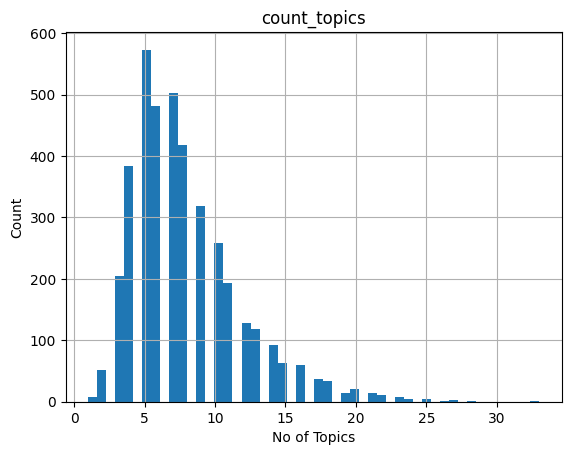

In [ ]:
# print(sns.distplot(df['count_topics']))

fig = df.count_topics.hist(bins = 50)
fig.set_title('count_topics')
fig.set_xlabel('No of Topics')
fig.set_ylabel('Count')

This is Not a Gausian Distribution it is more likely right Skewed.

<Axes: >

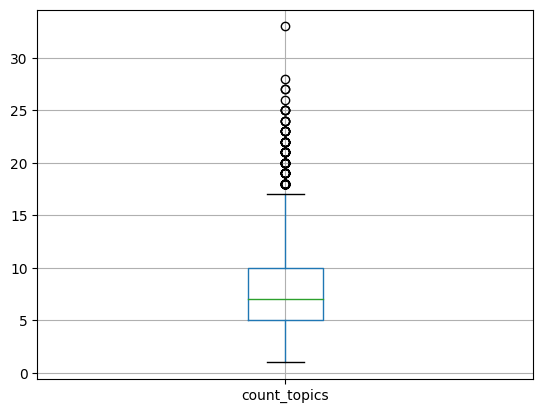

In [ ]:
df.boxplot(column = 'count_topics')

In [ ]:
df['count_topics'].describe()

count    4005.000000
mean        7.915106
std         3.904362
min         1.000000
25%         5.000000
50%         7.000000
75%        10.000000
max        33.000000
Name: count_topics, dtype: float64

**Observation** : Diffrence between 75 percentile and Max is very High and this will led to outlier

Compute IQR to calculate boundries.. (Technique only to be used when we have skewed distribution)

In [ ]:
IQR = df.count_topics.quantile(0.75) - df.count_topics.quantile(0.25)
lower_bridge = df.count_topics.quantile(0.25) - (IQR*1.5)
UPPER_bridge = df.count_topics.quantile(0.75) + (IQR*1.5)

In [ ]:
print(IQR)
print(lower_bridge)
print(UPPER_bridge)

5.0
-2.5
17.5


According to this after 17 everything is outlier, -ve value will not consider because counts cant be negative

Text(0, 0.5, 'Total_Views')

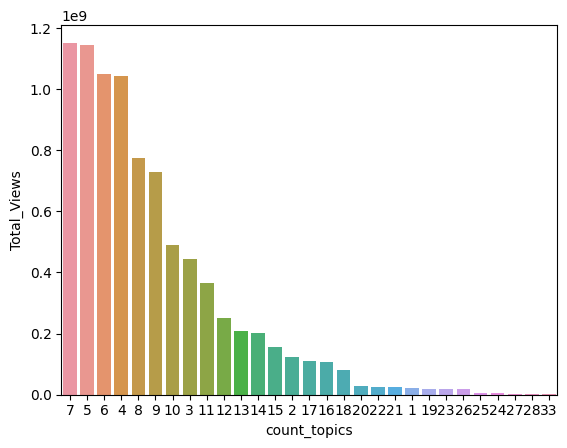

In [ ]:
# Compare Count_topics wrto views
result = df.groupby('count_topics')['views'].sum()
sns.barplot(x=result.index, y=result, order=result.sort_values(ascending = False).index)
plt.xlabel('count_topics')
plt.ylabel('Total_Views')

Count topics with greater than Upper Boundary (>17) are also not having much impact on views as well

In [ ]:
df.loc[df['count_topics']>=17,'count_topics'] = 17

Text(0, 0.5, 'Count')

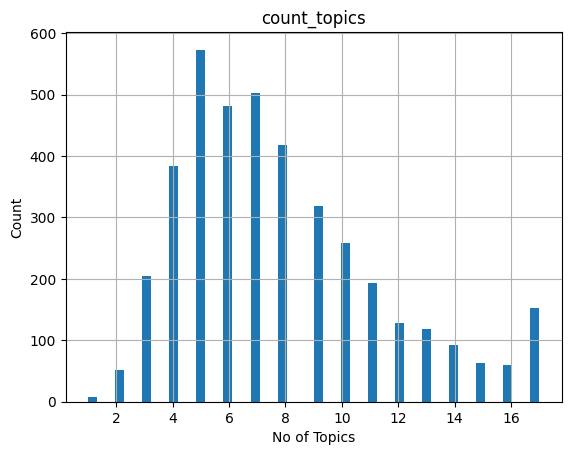

In [ ]:
fig = df.count_topics.hist(bins = 50)
fig.set_title('count_topics')
fig.set_xlabel('No of Topics')
fig.set_ylabel('Count')

**Observation**: We can clearly see the diffrence as it converted Right skewed distribution to almost Normal Distribution

### 2.2 Handle count_available_lang feature outlier

Text(0, 0.5, 'Count')

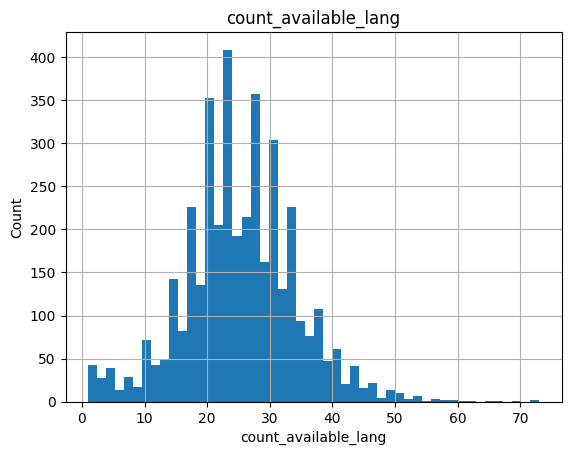

In [ ]:
fig = df.count_available_lang.hist(bins = 50)
fig.set_title('count_available_lang')
fig.set_xlabel('count_available_lang')
fig.set_ylabel('Count')

It is Gausion distributed, In case of Gausion distribution we will use diffrent technique where we will not calculate upper & lower IQR bridge but instead of that we will calculate boundries w.r.to 3rd standard dist

In [ ]:
upper_boundary = df.count_available_lang.mean() + 3 * df.count_available_lang.std()
lower_boundary = df.count_available_lang.mean() - 3 * df.count_available_lang.std()


print(upper_boundary)
print(lower_boundary)

52.41982191102851
-1.8115822106539703


In [ ]:
df.loc[df['count_available_lang']>=52,'count_available_lang'] = 52

Text(0, 0.5, 'Count')

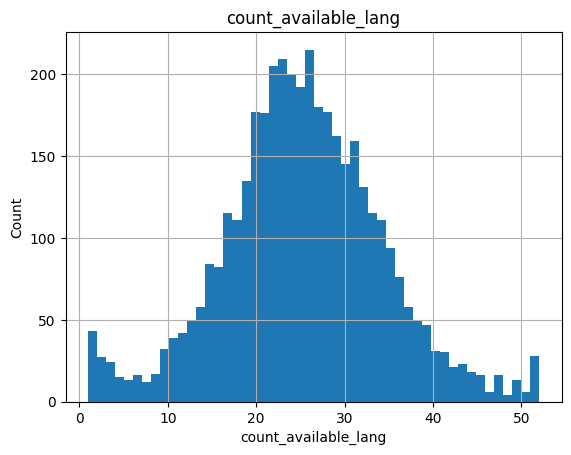

In [ ]:
fig = df.count_available_lang.hist(bins = 50)
fig.set_title('count_available_lang')
fig.set_xlabel('count_available_lang')
fig.set_ylabel('Count')

# 3 Feature Selection

In [ ]:
df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'available_lang', 'comments', 'duration', 'topics', 'related_talks',
       'url', 'description', 'transcript', 'published_year', 'comments_mean',
       'comments_NAN', 'all_speakers_NAN', 'occupations_NAN',
       'about_speakers_NAN', 'comments_end_distribution',
       'all_speakers_most_frequent_category', 'occupations_frequent_category',
       'about_speakers_most_frequent_category', 'event_counts',
       'Description_count', 'no_of_speakers', 'count_topics',
       'duration_in_min', 'count_available_lang', 'Age_of_Video',
       'published_day_Monday', 'published_day_Saturday',
       'published_day_Sunday', 'published_day_Thursday',
       'published_day_Tuesday', 'published_day_Wednesday', 'published_month_2',
       'published_month_3', 'published_month_4', 'published_month_5',
       'published_month_6', 'published_mon

In [ ]:
Numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

In [ ]:
df = df[Numerical_features]

In [ ]:
df.columns

Index(['talk_id', 'views', 'comments', 'duration', 'published_year',
       'comments_mean', 'comments_NAN', 'all_speakers_NAN', 'occupations_NAN',
       'about_speakers_NAN', 'comments_end_distribution', 'event_counts',
       'Description_count', 'no_of_speakers', 'count_topics',
       'duration_in_min', 'count_available_lang', 'Age_of_Video',
       'published_day_Monday', 'published_day_Saturday',
       'published_day_Sunday', 'published_day_Thursday',
       'published_day_Tuesday', 'published_day_Wednesday', 'published_month_2',
       'published_month_3', 'published_month_4', 'published_month_5',
       'published_month_6', 'published_month_7', 'published_month_8',
       'published_month_9', 'published_month_10', 'published_month_11',
       'published_month_12', 'native_lang_de', 'native_lang_en',
       'native_lang_es', 'native_lang_fr', 'native_lang_hi', 'native_lang_it',
       'native_lang_ja', 'native_lang_ko', 'native_lang_pt',
       'native_lang_pt-br', 'native_lan

In [ ]:
df.drop(['duration', 'talk_id','comments','event_counts'],axis = 1, inplace = True)

<ipython-input-62-2d9beb47884e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['duration', 'talk_id','comments','event_counts'],axis = 1, inplace = True)


In [ ]:
df.shape

(4005, 45)

In [ ]:
X = df.drop(['views'],axis = 1)
y = df['views']

### 3.1 Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3003, 44)
(3003,)
(1002, 44)
(1002,)


### 3.2 Feature importance by f_regression

In [ ]:
from sklearn.feature_selection import f_regression

In [ ]:
f_scores = f_regression(X_train, y_train)
f_scores


(array([7.18331264e+00, 6.90417302e+02, 2.13743929e+00, 1.29975771e-01,
        5.08825641e-01, 9.13644956e-01, 2.17216199e+02, 7.03691494e-02,
        3.53323498e-01, 1.62909202e+00, 1.55776905e+01, 3.94441445e+02,
        7.18331264e+00, 2.48355550e+00, 3.82827471e+00, 1.72381434e+00,
        5.39931310e+00, 7.20491228e-01, 1.54410967e+00, 6.90615782e-02,
        6.44879935e+00, 5.41024214e-02, 1.86162482e+00, 5.34551593e-01,
        7.77225553e-02, 1.45498009e-01, 4.14443184e-01, 1.83890677e+00,
        2.58283605e+00, 6.62874101e-03, 1.33057129e-01, 4.11018856e+00,
        3.16298796e+00, 4.95539051e-01, 0.00000000e+00, 1.50518097e-01,
        5.40871364e-01, 5.17185915e-04, 2.71953630e-01, 7.96563743e-02,
        5.00560699e-02, 2.52783614e+02, 9.79778414e+03, 8.05460401e+02]),
 array([7.39868760e-003, 3.89941733e-137, 1.43846356e-001, 7.18482535e-001,
        4.75703134e-001, 3.39226141e-001, 1.61305996e-047, 7.90818275e-001,
        5.52282589e-001, 2.01927446e-001, 8.09997807e-

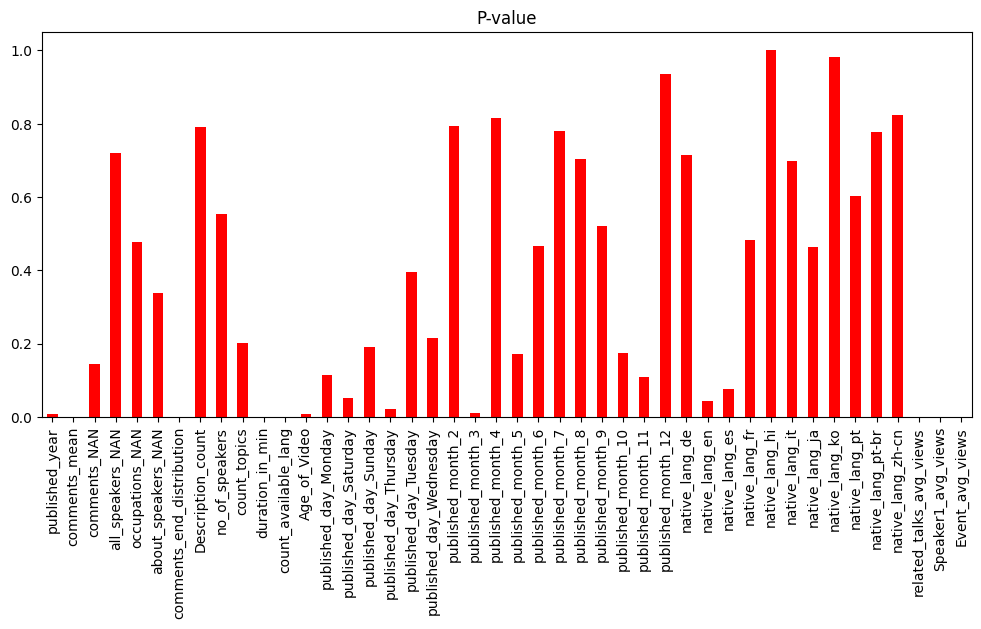

In [ ]:
p_values= pd.Series(f_scores[1],index= X.columns)
p_values.plot(kind='bar',color='red',figsize=(12,5))
plt.title('P-value')
plt.show()

**Analysis** : Taking a Threshold of P-value greater than 0.4 will be droped

In [ ]:
imp_features = ['related_talks_avg_views',
       'Speaker1_avg_views', 'Event_avg_views','published_year', 'comments_mean', 'comments_NAN','comments_end_distribution','duration_in_min', 'count_available_lang',
       'Age_of_Video','published_day_Monday', 'published_day_Saturday',
       'published_day_Sunday', 'published_day_Thursday',
       'published_day_Tuesday', 'published_day_Wednesday', 'native_lang_en',
       'native_lang_es','published_month_3', 'published_month_5','published_month_10', 'published_month_11',]

### 3.4 Correlation

In [ ]:
X_train = X_train[imp_features]
X_test = X_test[imp_features]

In [ ]:
X_train.head(2)

,related_talks_avg_views,Speaker1_avg_views,Event_avg_views,published_year,comments_mean,comments_NAN,comments_end_distribution,duration_in_min,count_available_lang,Age_of_Video,...,published_day_Sunday,published_day_Thursday,published_day_Tuesday,published_day_Wednesday,native_lang_en,native_lang_es,published_month_3,published_month_5,published_month_10,published_month_11
1255,3001532,10959936.2,2.519475e+06,2012,132.0,0,132.0,9,34,11,...,0,0,1,0,1,0,0,0,0,0
678,6697209,5730260.0,2.860665e+06,2015,115.0,0,115.0,8,35,8,...,0,0,1,0,1,0,0,0,0,0


<Axes: >

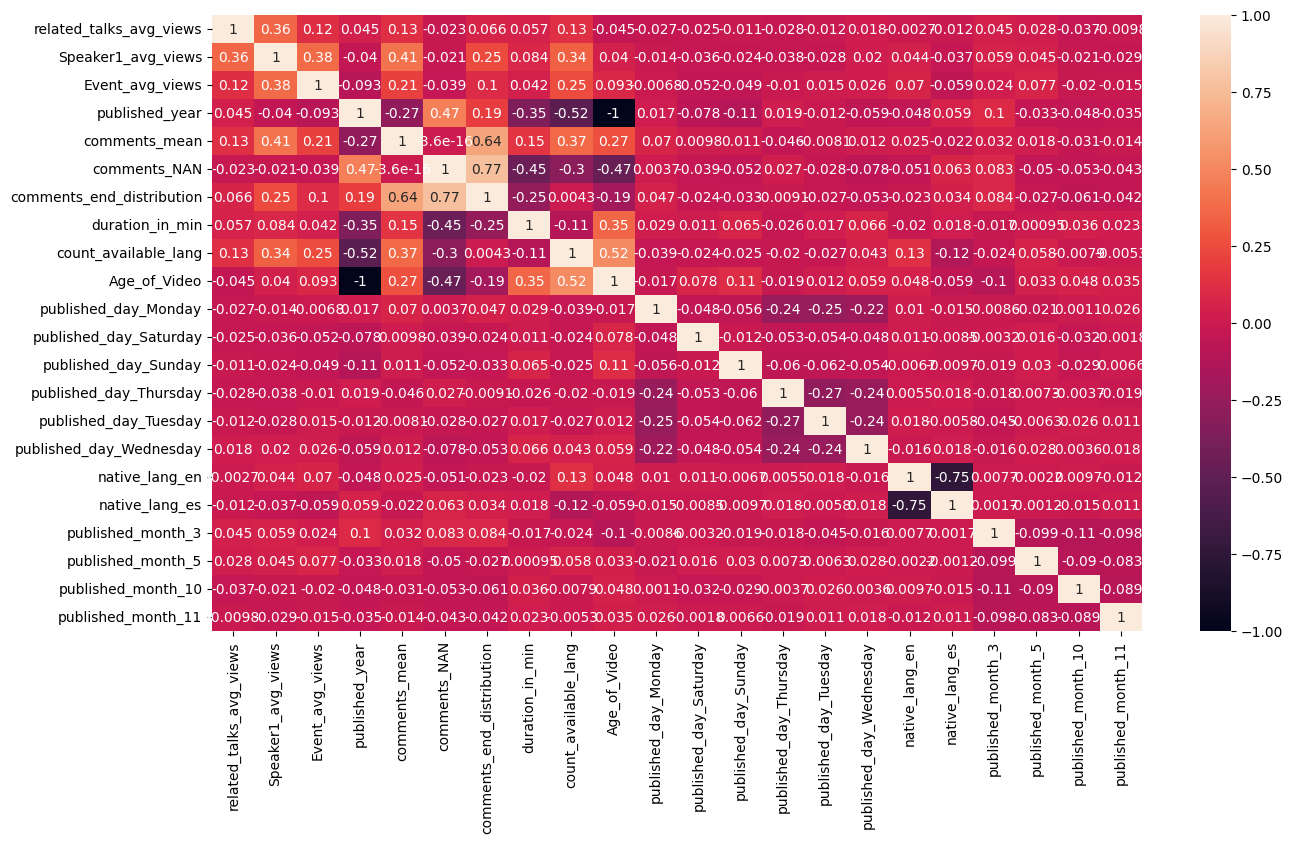

In [ ]:
corr = X_train.corr()
top_feat = corr.index
plt.figure(figsize= (15,8))
sns.heatmap(df[top_feat].corr(),annot = True)

### Compare Correlation and Feature importance to drop further features

- comments_end_distribution  is 77% co-rrelated with comments_NaN **DROP Comments_NAN**

### 3.4 Selecting Important Features

In [ ]:
X_train = X_train.drop(['comments_NAN'],axis = 1)

In [ ]:
X_test = X_test.drop(['comments_NAN'],axis = 1)

In [ ]:
X_train.shape

(3003, 21)

In [ ]:
X_test.shape

(1002, 21)

### 3.5 Save the files

In [ ]:
X_train.to_csv('X_train.csv',index = 'False')
y_train.to_csv('y_train.csv',index = 'False')
X_test.to_csv('X_test.csv',index = 'False')
y_test.to_csv('y_test.csv',index = 'False')